### This notebook borrows heavily from SMRT training notebook at https://github.com/smrt-model/training/blob/master/03_microstructure/01_practical_microstructure.ipynb


In [1]:
from IPython.display import HTML, display

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img

from scipy import fftpack
import scipy.optimize as opt

from henning_lowe import cropped_indicator, ice_volume_fraction, ACF2D, ACF1D, acf1d_fit_exp, ssa_from_acf_slope


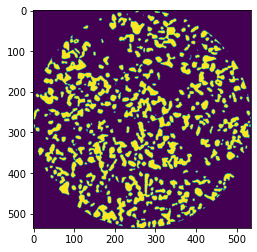

In [2]:
fig1 = plt.figure()
fig1.add_subplot()
filename = '../data/microCT/images/2n13_139-137cm_20um_redo_rec_voi_0253.png'
png_image=img.imread(filename)
plt.imshow(png_image[:,:,0])


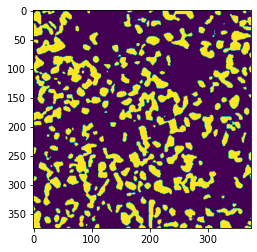

In [3]:
# Need to crop image to exclude region outside core
xmin = 75
xmax = 450
plt.imshow(png_image[xmin:xmax,xmin:xmax,0])


## Compute correlation function

[0.17297295316842765, 0.00012504021985651462]
[0.17383342983060626, 0.0001272004868322029]


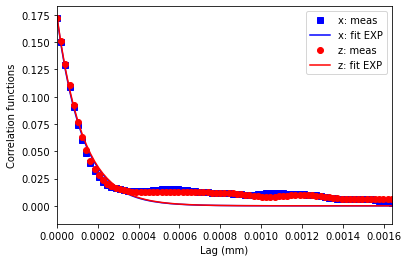

In [5]:
# get the ice indicator function for an example image
#
# 20.5 microns: email from Lauren-> Mike 12th Jan 2021
# pixel_size = 0.021e-3 # in mm
pixel_size = 20.5e-6

indicator_function = cropped_indicator(filename)
# get the volume fraction
volume_fraction = ice_volume_fraction(indicator_function)
# ACTION REQUIRED HERE
# get the 2d correlation function
acf2d = ACF2D(indicator_function)


# get the 1d correlation function along an axis
acf1d_x = ACF1D(acf2d, 1)
acf1d_z = ACF1D(acf2d, 0)

# get the corresponding lags
r_x = pixel_size * np.arange(len(acf1d_x))
r_z = pixel_size * np.arange(len(acf1d_z))


# get the fit versions
r_max = 100 * pixel_size
acf1d_fit_exp_x, opt_param_exp_x = acf1d_fit_exp(r_x, acf1d_x, r_max)
print(opt_param_exp_x)
acf1d_fit_exp_z, opt_param_exp_z = acf1d_fit_exp(r_z, acf1d_z, r_max)
print(opt_param_exp_z)
#acf1d_fit_ts_x, opt_param_ts_x = acf1d_fit_ts(r_x, acf1d_x, r_max)
#print(opt_param_ts_x)
#acf1d_fit_ts_z, opt_param_ts_z = acf1d_fit_ts(r_z, acf1d_z, r_max)
#print(opt_param_ts_z)



# plot
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)

ax2.plot(r_x, acf1d_x, 's', color='b', label='x: meas')
ax2.plot(r_x, acf1d_fit_exp_x, '-', color='b', label='x: fit EXP')
#ax2.plot(r_x, acf1d_fit_ts_x, ':', color='b', label='x: fit TS')

ax2.plot(r_z, acf1d_z, 'o', color='r', label='z: meas')
ax2.plot(r_z, acf1d_fit_exp_z, '-', color='r', label='z: fit EXP')
#ax2.plot(r_z, acf1d_fit_ts_z, ':', color='r', label='z: fit TS')

ax2.set_xlim([0, 80*pixel_size])
ax2.set_xlabel("Lag (mm)")
ax2.set_ylabel("Correlation functions")

ax2.legend()


In [6]:
### Check SSA



SSA_exp_x = ssa_from_acf_slope(volume_fraction, volume_fraction*(1-volume_fraction)/opt_param_exp_x[1])
SSA_exp_z = ssa_from_acf_slope(volume_fraction, volume_fraction*(1-volume_fraction)/opt_param_exp_z[1])
#SSA_ts_x = ssa_from_acf_slope(volume_fraction, volume_fraction*(1-volume_fraction)/opt_param_ts_x[1])
#SSA_ts_z = ssa_from_acf_slope(volume_fraction, volume_fraction*(1-volume_fraction)/opt_param_ts_z[1])


print("SSA from exponential fit in x direction: ", SSA_exp_x, "m^2/kg")
print("SSA from exponential fit in z direction: ", SSA_exp_z, "m^2/kg")

SSA from exponential fit in x direction:  27.095033603402943 m^2/kg
SSA from exponential fit in z direction:  26.63487415153065 m^2/kg
